## Tensorflowのワークフローを追う

In [7]:
import tensorflow as tf

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

### データ読み込み

In [4]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [15]:
print(x_train.shape, x_train.dtype)  # (batch, height, width) --
print(y_train.shape)  # (label) --

(60000, 28, 28) uint8
(60000,)


In [12]:
tx = x_train[0, :, :]; ty = y_train[0]

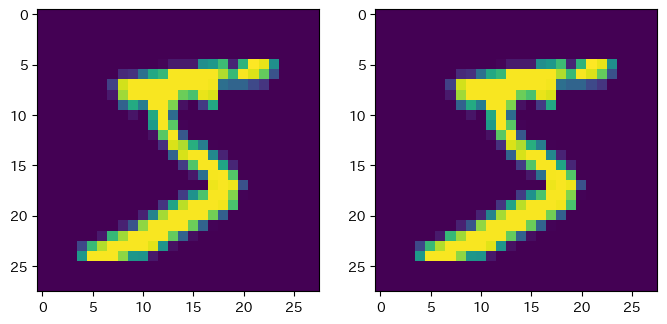

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].imshow(tx)
ax[1].imshow(tx / 255.0)  # 画像はfloatにしても変わらない（当たり前） --

### モデル作成 --

In [24]:
# Define model --
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])

### まだx_train, y_trainを/255してないから、modelの値がクソデカになる

In [32]:
# 別に学習してないだけで、今でもoutputは出せる --
predictions = model(x_train[:1])   # x_train[:1].shape -> (1, 28, 28) --
predictions  # 最終のDenseが(10)だから10個出てくる --

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[ -98.46056 ,   19.26678 , -126.22731 ,  -80.03109 ,  -85.19473 ,
         -58.419476,  131.60469 ,  -40.602074,  274.49673 ,   83.022644]],
      dtype=float32)>

In [33]:
tf.nn.softmax(predictions)  

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)>

### x_train, y_trainを正規化 --

In [36]:
x_train = x_train/255.0
x_test = x_test/255.0

In [37]:
# 別に学習してないだけで、今でもoutputは出せる --
predictions = model(x_train[:1])   # x_train[:1].shape -> (1, 28, 28) --
predictions  # 最終のDenseが(10)だから10個出てくる --

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[-0.38611966,  0.07555604, -0.4950091 , -0.31384736, -0.334097  ,
        -0.22909594,  0.5160967 , -0.15922372,  1.0764577 ,  0.32557908]],
      dtype=float32)>

In [40]:
print(tf.nn.softmax(predictions))
print(tf.nn.softmax(predictions).numpy().sum())  # softmax のoutputのsumは1 --

tf.Tensor(
[[0.05932531 0.09413328 0.05320469 0.06377163 0.06249325 0.06941199
  0.14624047 0.07443543 0.25611162 0.1208723 ]], shape=(1, 10), dtype=float32)
1.0


### ↓ これ、結構やってる人いない？<br>
<span style="font-size: 80%">注意: この tf.nn.softmax をネットワークの最後のレイヤーのアクティベーション関数として組み込むことも可能です。<br>こうすることでモデルの出力をより直接的に解釈可能にすることもできますが、softmax 出力を使用する場合、<br>すべてのモデルに対して正確で数値的に安定した損失計算を提供することは不可能であるため、この方法は推奨されません。</span>

### 損失関数の定義

In [41]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)


In [43]:
loss_fn(y_train[:1], predictions)
# ([logitsベクトル], 正解のインデックス) -> スカラー損失 --
# 正解の負の対数確率になるので、 -tf.math.log(1/10) ~ 2.3に近くなる --

<tf.Tensor: shape=(), dtype=float32, numpy=2.6676955>

### モデルのコンパイル

In [44]:
model.compile(optimizer="adam", loss=loss_fn, metrics=["accuracy"])

In [45]:
model.fit(x_train, y_train, epochs=1)

1875/1875 [==============================] - 3s 2ms/step - loss: 0.2997 - accuracy: 0.9127


In [49]:
model.evaluate(x_test, y_test, verbose=5)

[0.145853191614151, 0.9531000256538391]

In [60]:
y_pred = tf.nn.softmax(model.predict(x_test)).numpy()

313/313 [==============================] - 0s 1ms/step


In [70]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred.argmax(axis=1))

0.9531